In [1]:
import pandas as pd
import numpy as np
import matplotlib 
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv").drop(['Unnamed: 0'],axis=1)
data.head()

,State,District,Persons,Males,Females,Growth..1991...2001.,Rural,Urban,Scheduled.Caste.population,Percentage...SC.to.total,...,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
0,AN,"District Andamans (01), Andaman & Nicobar Isla...",314084,170319,143765,30.14,197886,116198,-,-,...,102,16,78,161.0,187,201,243,28.7,39.1,32.0
1,AN,"District Nicobars (02), Andaman & Nicobar Isla...",42068,22653,19415,7.19,42068,-,-,-,...,38,4,31,36.0,49,51,111,28.0,33.3,38.7
2,Andhra,"District Adilabad (01), Andhra Pradesh (28)",2488003,1250958,1237045,19.06,1827986,NaN,NaN,NaN,...,976,61,432,558.0,814,979,544,53.0,39.9,7.0
3,Andhra,"District Nizamabad (02), Andhra Pradesh (28)",2345685,1162905,1182780,14.98,1920947,NaN,NaN,NaN,...,614,50,330,602.0,746,760,82,52.8,37.6,9.6
4,Andhra,"District Karimnagar (03), Andhra Pradesh (28)",3491822,1747968,1743854,14.47,2813010,NaN,NaN,NaN,...,863,70,475,795.0,912,823,218,55.8,36.4,7.8


## Cleaning Dataset

The dataset contains abbreviated state names, so first of all let's convert them to full forms. The abbreviated states are mentioned on Kaggle [here](https://www.kaggle.com/bazuka/census2001).

In [3]:
abb_st = ['AN','Andhra','CG','D_D','D_N_H','HP','JK','MP','TN','UP','WB']
full_names = ['Andaman & Nicobar Islands','Andhra Pradesh','Chattisgarh','Daman & Diu','Dadra & Nagar Haveli','Himachal Pradesh','Jammu & Kashmir','Madhya Pradesh'
             ,'Tamil Nadu','Uttar Pradesh','West Bengal']

states = data['State']
for i in range(states.shape[0]):
    if states[i] in abb_st:
        #print abb_st.index(states[i])
        states[i] = full_names[abb_st.index(states[i])]
data['State'] = states

/Users/dexter/anaconda3/envs/DAND/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Checking null values if any

In [4]:
data.isnull().sum().sort_values(ascending=False)

Scheduled.Caste.population                563
Percentage...SC.to.total                  562
Urban                                     522
Electricity..Agriculture.                 208
Imp.Town.3.Name                           142
Imp.Town.3.Population                     108
Imp.Town.2.Name                            97
SC.3.Name                                  66
Imp.Town.2.Population                      64
SC.2.Name                                  64
Religeon.3.Name                            53
ST.2.Population                            53
Religeon.2.Name                            53
Religeon.1.Name                            53
College                                    52
ST.3.Population                            52
ST.1.Population                            51
SC.1.Name                                  51
ST.2.Name                                  50
ST.3.Name                                  50
Imp.Town.1.Name                            21
Imp.Town.1.Population             

Since Scheduled.Caste.population, Percentage...SC.to.total,Urban contains most null values, we will drop those columns.

In [5]:
data.drop(['Scheduled.Caste.population', 'Percentage...SC.to.total','Urban'],axis=1,inplace=True)

In [6]:
data.columns

Index([u'State', u'District', u'Persons', u'Males', u'Females',
       u'Growth..1991...2001.', u'Rural', u'Number.of.households',
       u'Household.size..per.household.',
       u'Sex.ratio..females.per.1000.males.', u'Sex.ratio..0.6.years.',
       u'Scheduled.Tribe.population', u'Percentage.to.total.population..ST.',
       u'Persons..literate', u'Males..Literate', u'Females..Literate',
       u'Persons..literacy.rate', u'Males..Literatacy.Rate',
       u'Females..Literacy.Rate', u'Total.Educated', u'Data.without.level',
       u'Below.Primary', u'Primary', u'Middle',
       u'Matric.Higher.Secondary.Diploma', u'Graduate.and.Above',
       u'X0...4.years', u'X5...14.years', u'X15...59.years',
       u'X60.years.and.above..Incl..A.N.S..', u'Total.workers',
       u'Main.workers', u'Marginal.workers', u'Non.workers', u'SC.1.Name',
       u'SC.1.Population', u'SC.2.Name', u'SC.2.Population', u'SC.3.Name',
       u'SC.3.Population', u'Religeon.1.Name', u'Religeon.1.Population',
       

# ANALYSIS

### Total Population state wise

In [7]:
data.groupby(['State']).sum()['Persons'].sort_values(ascending=False)

State
Uttar Pradesh                166197921
Maharashtra                   96878627
Bihar                         82998509
West Bengal                   80176197
Andhra Pradesh                71308587
Tamil Nadu                    62405679
Madhya Pradesh                60348023
Rajasthan                     56507188
Karnataka                     52850562
Gujarat                       50671017
Orrisa                        35664657
Kerala                        31841374
Jharkhand                     26945829
Assam                         26655528
Punjab                        24358999
Haryana                       21144564
Chattisgarh                   20833803
Delhi                         13850507
Jammu & Kashmir               10143700
Uttranchal                     8489349
Himachal Pradesh               6077900
Tripura                        3199203
Meghalya                       2318822
Manipur                        2010275
Nagaland                       1990036
Goa                

### Total Districts in Each State

In [8]:
data.groupby(['State']).count()['District'].sort_values(ascending=False)

State
Uttar Pradesh                70
Madhya Pradesh               45
Bihar                        37
Maharashtra                  35
Rajasthan                    32
Tamil Nadu                   30
Orrisa                       29
Karnataka                    27
Gujarat                      25
Assam                        23
Andhra Pradesh               22
Haryana                      19
West Bengal                  18
Jharkhand                    18
Punjab                       17
Chattisgarh                  16
Jammu & Kashmir              14
Kerala                       14
Uttranchal                   13
ArunachalPradesh             13
Himachal Pradesh             12
Delhi                         9
Manipur                       8
Mizoram                       8
Nagaland                      8
Meghalya                      7
Pondicherry                   4
Tripura                       4
Sikkim                        4
Daman & Diu                   2
Goa                           2
An

What we can see here is state with more districts has more populations.

### Most populated district of each state

In [21]:
sorted_d = data.sort_values('Persons',ascending=False)
sorted_d = sorted_d.groupby('State').first()
sorted_d = sorted_d.sort_values('Persons',ascending=False)

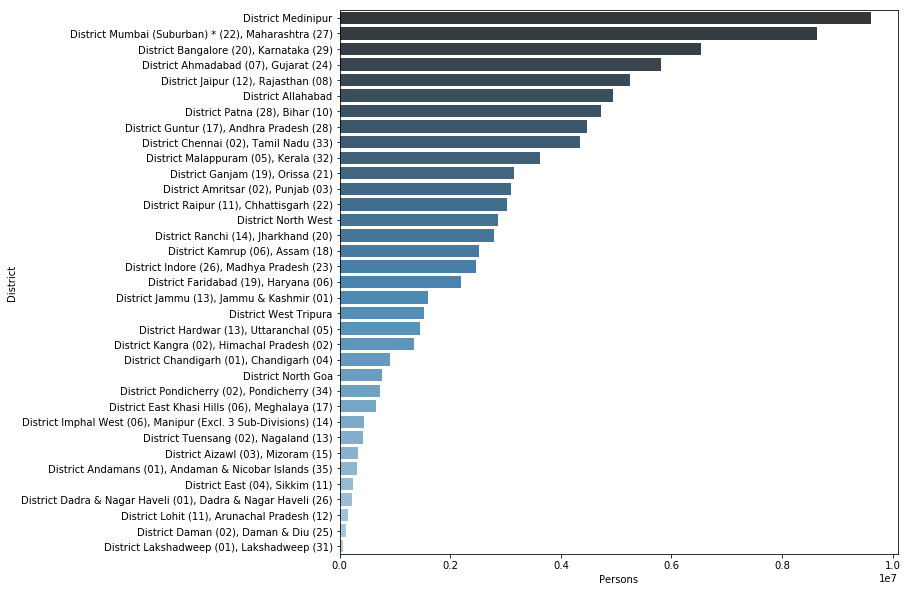

In [23]:
plt.subplots(figsize=(10,10))
sns.barplot(y='District',x='Persons',data=sorted_d,palette="Blues_d")

The analysis below done are done according to heatmaps.

### States according to education level

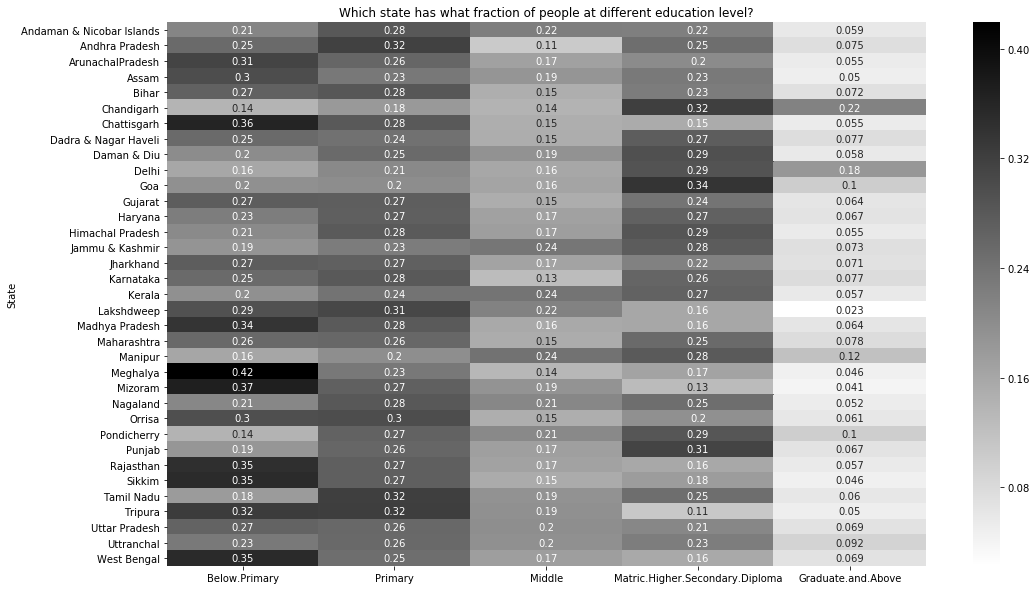

In [11]:
edu_cols = ['Below.Primary', 'Primary', 'Middle', 'Matric.Higher.Secondary.Diploma',
                'Graduate.and.Above']
temp = data[edu_cols + ['State']].groupby('State').sum()
temp = temp.div(temp.sum(axis=1),axis=0)

plt.subplots(figsize=(17,10))
fig = sns.heatmap(temp,annot=True,cmap="gray_r")
plt.title("Which state has what fraction of people at different education level?")
plt.xticks(rotation=0)
fig.get_figure().savefig("first.png")

States like Delhi, Manipur, Chandigarh have a lot of highly educated people. A large fraction of Meghalaya, Mizoram, Chattisgarh and West Bengal is below primary though. Lots of kids? or perhaps lots of people who never got a chance to go to school because of the harsh mountains? Let's check the population distibution of all states.

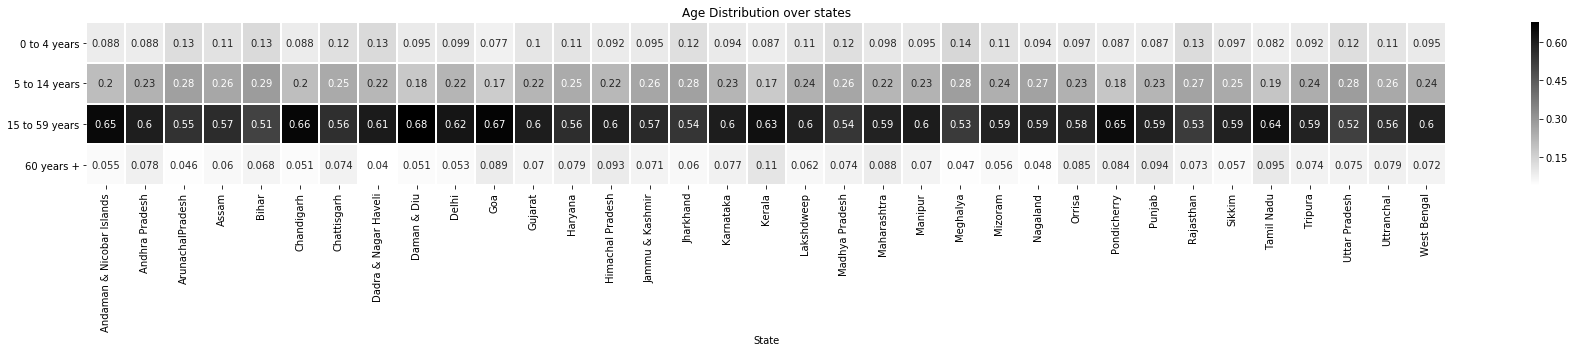

In [15]:
age_cols = ['X0...4.years','X5...14.years',
            'X15...59.years','X60.years.and.above..Incl..A.N.S..']
temp = data[age_cols+['State']].groupby('State').sum()
temp.columns=['0 to 4 years', '5 to 14 years', '15 to 59 years', '60 years +']
temp = temp.div(temp.sum(axis=1),axis=0)
plt.subplots(figsize=(25,5))
fig = sns.heatmap(temp.T,annot=True,cmap="gray_r",linewidths=1)
plt.title("Age Distribution over states")
plt.xticks(rotation=90)
plt.tight_layout()
fig.get_figure().savefig("second.png")

Looks like all the states mentioned above have approximately 0.4 fraction of the total population below 14 yrs of age, hence making education levels high for upto primary level. Let's move onto checking workers in each states.

### Distribution of workers

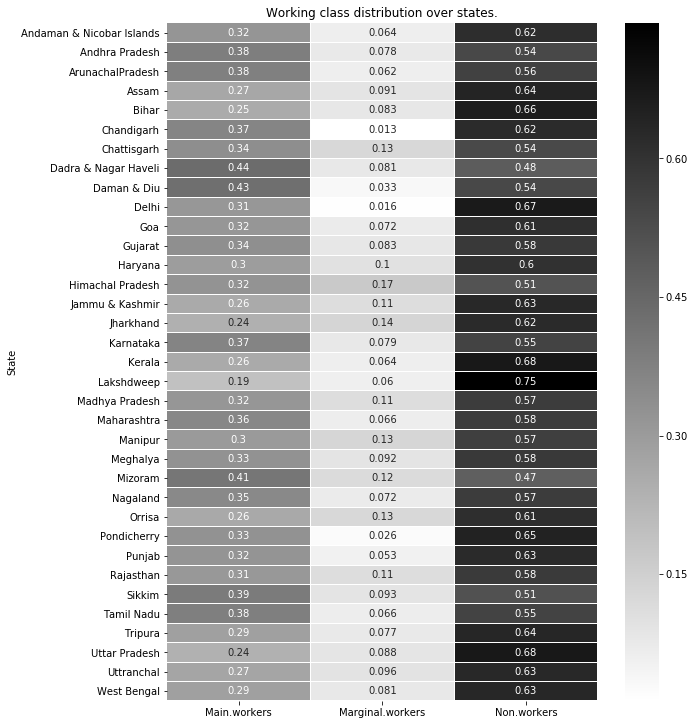

In [24]:
worker_cols = ['Main.workers', 'Marginal.workers', 'Non.workers']
temp = data[worker_cols+['State']].groupby('State').sum()

plt.figure(figsize=(10, 10))
temp = temp.div(temp.sum(axis=1),axis=0) # What fraction of the group is in what state
fig = sns.heatmap(temp, linecolor='white',
            linewidths=0.01, cmap='gray_r', annot=True)
plt.tight_layout()
plt.title('Working class distribution over states.')
fig.get_figure().savefig('third.png')

States like Lakshwadeep, Jharkhand, Tripura and UP have among the lowest fraction of people who are main workers. It is hilarious that UP is lumped together with Lakshwadeep,Jharkhand and Tripura.

Dadra and Nager Haveli and Mizoram are the only two states with less than 50% people who are non workers.

It might be because of the most women are housewives. If we assume that half of the population is women, and all of them are married; it leads us to half of the population being non.workers because of being housewives.

### Religion Distribution

1. Let's check which religion is dominant in which state

In [28]:
religion_cols = ['Religeon.1.Name','Religeon.1.Population',
                 'Religeon.2.Name','Religeon.2.Population',
                 'Religeon.3.Name','Religeon.3.Population']
temp = data[religion_cols + ['State']].copy()
temp.head()

,Religeon.1.Name,Religeon.1.Population,Religeon.2.Name,Religeon.2.Population,Religeon.3.Name,Religeon.3.Population,State
0,1.Hindus,235862,2.Christians,49033,3.Muslims,27134,Andaman & Nicobar Islands
1,1.Christians,28145,2.Hindus,10727,3.Muslims,2131,Andaman & Nicobar Islands
2,NaN,2207843,NaN,236844,NaN,24392,Andhra Pradesh
3,1.Hindus,1983275,2.Muslims,338824,3.Christians,16204,Andhra Pradesh
4,1.Hindus,3251834,2.Muslims,213811,3.Christians,20576,Andhra Pradesh


In [41]:
for i in '123':
    temp['Religeon.' + i + '.Name'] = temp['Religeon.' + i + '.Name'].str.split(".").str[-1]
temp2 = pd.DataFrame(columns=['Rel_Name','Population','State'])
for i in '123':
    a = temp[['Religeon.' + i + '.Name','Religeon.' + i + '.Population','State']]
    a.columns=['Rel_Name','Population','State']
    temp2 = pd.concat([a,temp2])

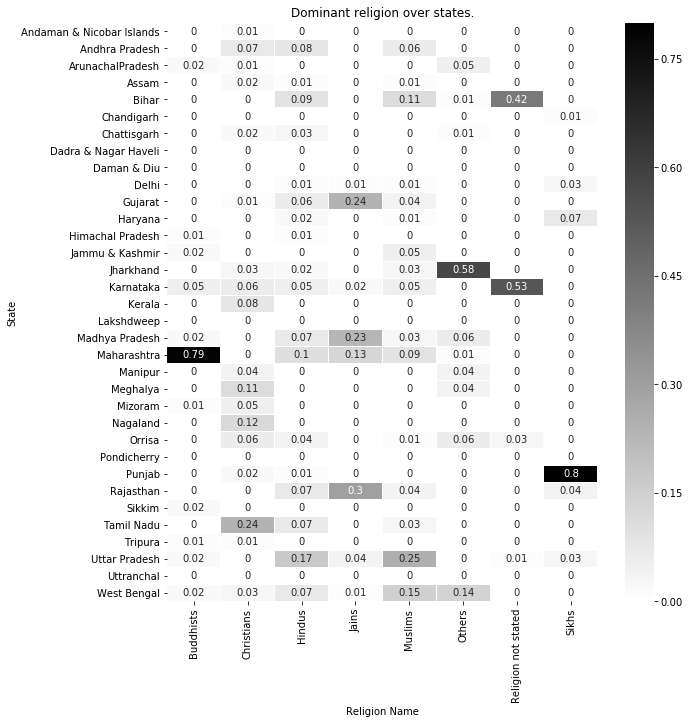

In [43]:
plt.figure(figsize=(10, 10))
gr = temp2.groupby(['Rel_Name','State']).sum()
temp2 = gr.reset_index().fillna(1)
cross_t = pd.crosstab(temp2.State,temp2.Rel_Name,temp2.Population,aggfunc=np.sum)
cross_t.fillna(1,inplace=True)
cross_t2 = cross_t.div(cross_t.sum(axis=0),axis=1).round(2)
fig = sns.heatmap(cross_t2, linecolor='white',
            linewidths=0.01, cmap='gray_r', annot=True)
plt.tight_layout()
plt.title('Dominant religion over states.')
plt.xlabel('Religion Name')
fig.get_figure().savefig('fourth.png')

Almost all the Budhists in the country reside in Maharashtra. Bihar has been rounded to 0 despite being the state which has [Bodh Gaya](https://en.wikipedia.org/wiki/Bodh_Gaya) . Christians are spread out all over the country, as are Hindus and Muslims. Jains as expected are spread across Rajasthan, Gujarat and Madhya Pradesh. Sikhs are concentrated in Punjab and the states around it. This is as expected.

Now let's check the distribution of each religion in each state.

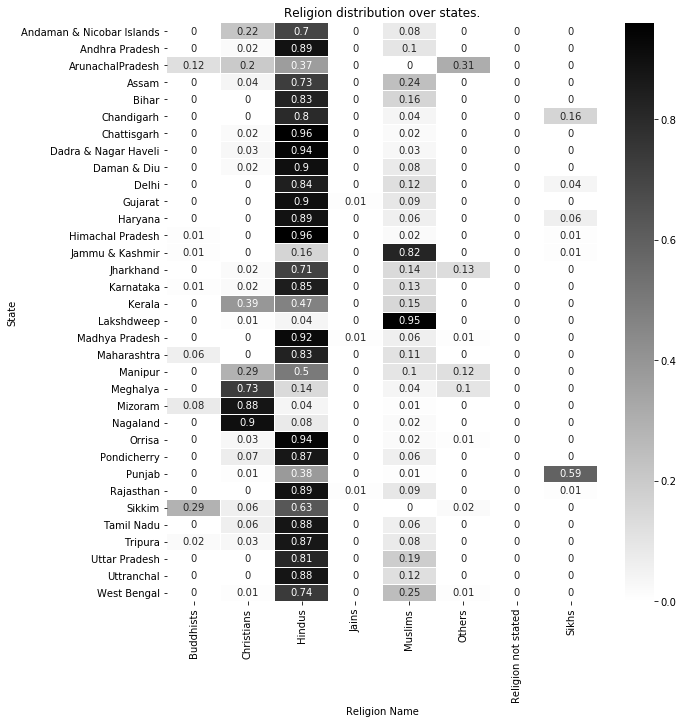

In [45]:
plt.figure(figsize=(10, 10))
cross_t2 = cross_t.div(cross_t.sum(axis=1),axis=0).round(2)
fig = sns.heatmap(cross_t2, linecolor='white',
            linewidths=0.01, cmap='gray_r', annot=True)
plt.tight_layout()
plt.title('Religion distribution over states.')
plt.xlabel('Religion Name')
fig.get_figure().savefig('fifth.png')

Hindus are literally the majority everywhere. Punjab as expected is a Sikh state, but even there the Sikh only comprise of 59% of the population. The north east has it's fair share of states composed mainly of Christians.
The state of Jammu and Kashmir is mostly Muslim state. Arunachal Pradesh has a good fraction of it's people as <b>"Others"</b>, nearly equaling the Hindu population. <b>"Religion not Stated"</b> actually got completely rounded to zero. If you are in India and you meet an <b>atheist</b>, you have met a <b>very rare person</b>.

Punjab and it's neighbors Chandigarh and Haryana are having a <b>healthy fraction of Sikhs</b>.

## Population stats

In [46]:
data.columns

Index([u'State', u'District', u'Persons', u'Males', u'Females',
       u'Growth..1991...2001.', u'Rural', u'Number.of.households',
       u'Household.size..per.household.',
       u'Sex.ratio..females.per.1000.males.', u'Sex.ratio..0.6.years.',
       u'Scheduled.Tribe.population', u'Percentage.to.total.population..ST.',
       u'Persons..literate', u'Males..Literate', u'Females..Literate',
       u'Persons..literacy.rate', u'Males..Literatacy.Rate',
       u'Females..Literacy.Rate', u'Total.Educated', u'Data.without.level',
       u'Below.Primary', u'Primary', u'Middle',
       u'Matric.Higher.Secondary.Diploma', u'Graduate.and.Above',
       u'X0...4.years', u'X5...14.years', u'X15...59.years',
       u'X60.years.and.above..Incl..A.N.S..', u'Total.workers',
       u'Main.workers', u'Marginal.workers', u'Non.workers', u'SC.1.Name',
       u'SC.1.Population', u'SC.2.Name', u'SC.2.Population', u'SC.3.Name',
       u'SC.3.Population', u'Religeon.1.Name', u'Religeon.1.Population',
       

### Population Percentage Living in Rural Areas